# Data Science Course Week 1 - Pandas and Data Manipulation

## We will be using real data sources to explore the features of Pandas

MovieLens 100k movie rating data:
    main page: http://grouplens.org/datasets/movielens/
    data dictionary: http://files.grouplens.org/datasets/movielens/ml-100k-README.txt
    files: u.user, u.data, u.item

WHO alcohol consumption data:
    article: http://fivethirtyeight.com/datalab/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/    
    original data: https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption
    file: drinks.csv (with additional 'continent' column)

National UFO Reporting Center data:
    main page: http://www.nuforc.org/webreports.html
    file: ufo.csv


In [4]:
import pandas as pd

### Reading Files, Selecting Columns, and Summarizing

In [6]:
# can read a file from local computer or directly from a URL
pd.read_table('u.user')
#pd.read_table('https://raw.githubusercontent.com/solresol/SYD_DAT_5/master/labs/Week 1/u.user')

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101
5,7|57|M|administrator|91344
6,8|36|M|administrator|05201
7,9|29|M|student|01002
8,10|53|M|lawyer|90703
9,11|39|F|other|30329


In [7]:
# read 'u.user' into 'users'
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('u.user', sep='|', header=None, names=user_cols, index_col='user_id', dtype={'zip_code':str, 'gender':str})

In [8]:
# examine the users data
#users                   # print the first 30 and last 30 rows
#type(users)             # DataFrame
#users.head()            # print the first 5 rows
#users.head(10)          # print the first 10 rows
#users.tail()            # print the last 5 rows
#users.index             # "the index" (aka "the labels")
#users.columns           # column names (which is "an index")
#users.dtypes            # data types of each column
users.shape             # number of rows and columns
users.values            # underlying numpy array
users.info()            # concise summary (including memory usage)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [9]:
users.shape

(943, 4)

In [11]:
users.values

array([[24L, 'M', 'technician', '85711'],
       [53L, 'F', 'other', '94043'],
       [23L, 'M', 'writer', '32067'],
       ..., 
       [20L, 'M', 'student', '97229'],
       [48L, 'F', 'librarian', '78209'],
       [22L, 'M', 'student', '77841']], dtype=object)

In [26]:
users.columns

Index([u'age', u'gender', u'occupation', u'zip_code'], dtype='object')

In [21]:
users.values

array([[24L, 'M', 'technician', '85711'],
       [53L, 'F', 'other', '94043'],
       [23L, 'M', 'writer', '32067'],
       ..., 
       [20L, 'M', 'student', '97229'],
       [48L, 'F', 'librarian', '78209'],
       [22L, 'M', 'student', '77841']], dtype=object)

In [12]:
# select a column
#users['gender']         # select one column
#type(users['gender'])   # Series
users.gender            # select one column using the DataFrame attribute


user_id
1      M
2      F
3      M
4      M
5      F
6      M
7      M
8      M
9      M
10     M
11     F
12     F
13     M
14     M
15     F
16     M
17     M
18     F
19     M
20     F
21     M
22     M
23     F
24     F
25     M
26     M
27     F
28     M
29     M
30     M
      ..
914    F
915    M
916    M
917    F
918    M
919    M
920    F
921    F
922    F
923    M
924    M
925    F
926    M
927    M
928    M
929    M
930    F
931    M
932    M
933    M
934    M
935    M
936    M
937    M
938    F
939    F
940    M
941    M
942    F
943    M
Name: gender, dtype: object

In [26]:
# summarize (describe) the data
#users.describe()                    # describe all numeric columns
#users.describe(include=['object'])  # describe all object columns (can include multiple types)
#users.describe(include='all')       # describe all columns
#users.gender.describe()             # describe a single column
users.age.mean()                    # only calculate the mean


34.051961823966067

In [13]:
# count the number of occurrences of each value
#users.occupation.value_counts()     # most useful for categorical variables
users.age.value_counts()        # can also be used with numeric variables


30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, dtype: int64

##EXERCISE ONE

In [73]:
# read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_table('drinks.csv', sep=',')
drinks = pd.read_csv('drinks.csv')              # assumes separator is comma


In [15]:
# print the head and the tail
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [11]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [16]:
# examine the default index, data types, and shape
drinks.index
drinks.dtypes
drinks.shape

(193, 6)

In [17]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [18]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [28]:
# print the 'beer_servings' Series
drinks['beer_servings']
drinks.beer_servings


0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, dtype: int64

In [39]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [41]:
# calculate the average 'beer_servings' for the entire dataset
drinks.describe()                   # summarize all numeric columns
drinks.beer_servings.describe()     # summarize only the 'beer_servings' Series
drinks.beer_servings.mean()         # only calculate the mean


106.16062176165804

In [145]:

# count the number of occurrences of each 'continent' value and see if it looks correct
drinks.continent.value_counts()


AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

#### Filtering and Sorting

In [23]:
# logical filtering: only show users with age < 20
young_bool = users.age < 20         # create a Series of booleans...
users[young_bool]                   # ...and use that Series to filter rows
users[users.age < 20]               # or, combine into a single step
users[users.age < 20].occupation    # select one column from the filtered results
users[users.age < 20].occupation.value_counts()     # value_counts of resulting Series

student          64
other             4
none              3
writer            2
entertainment     2
salesman          1
artist            1
Name: occupation, dtype: int64

In [97]:
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [98]:
# logical filtering with multiple conditions

users[(users.age < 20) & (users.gender=='M')]       # ampersand for AND condition
#users[(users.age < 20) | (users.age > 60)]          # pipe for OR condition
#users[users.occupation.isin(['doctor', 'lawyer'])]  # alternative to multiple OR conditions


,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
57,16,M,none,84010
67,17,M,student,60402
68,19,M,student,22904
101,15,M,student,05146
110,19,M,student,77840
142,13,M,other,48118
179,15,M,entertainment,20755
221,19,M,student,20685


In [99]:
users[users.occupation.isin(['doctor', 'lawyer'])]  # alternative to multiple OR conditions


,age,gender,occupation,zip_code
user_id,,,,
10,53,M,lawyer,90703
125,30,M,lawyer,22202
126,28,F,lawyer,20015
138,46,M,doctor,53211
161,50,M,lawyer,55104
205,47,M,lawyer,06371
251,28,M,doctor,85032
299,29,M,doctor,63108
339,35,M,lawyer,37901


In [22]:
users[(users.age < 20) & (users.gender=='M')]

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
57,16,M,none,84010
67,17,M,student,60402
68,19,M,student,22904
101,15,M,student,05146
110,19,M,student,77840
142,13,M,other,48118
179,15,M,entertainment,20755
221,19,M,student,20685


In [24]:
users[(users.age < 20) | (users.age > 60)]

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
36,19,F,student,93117
52,18,F,student,55105
57,16,M,none,84010
67,17,M,student,60402
68,19,M,student,22904
101,15,M,student,05146
106,61,M,retired,55125
110,19,M,student,77840


In [149]:
# sorting
users.age.order()                   # sort a column
users.sort('age')                   # sort a DataFrame by a single column
users.sort('age', ascending=False)  # use descending order instead
users.sort(['occupation', 'age'])   # sort by multiple columns


C:\Users\huangb87\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app
C:\Users\huangb87\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\huangb87\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\huangb87\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,age,gender,occupation,zip_code
user_id,,,,
118,21,M,administrator,90210
180,22,F,administrator,60202
282,22,M,administrator,20057
317,22,M,administrator,13210
439,23,F,administrator,20817
509,23,M,administrator,10011
394,25,M,administrator,96819
665,25,M,administrator,55412
726,25,F,administrator,80538


In [33]:
users.age.order()                   # sort a column, old method 

C:\Users\huangb87\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


user_id
30      7
471    10
289    11
880    13
609    13
142    13
674    13
628    13
813    14
206    14
887    14
849    15
281    15
461    15
618    15
179    15
101    15
57     16
580    16
550    16
451    16
434    16
621    17
619    17
761    17
375    17
904    17
646    17
582    17
257    17
       ..
90     60
308    60
931    60
752    60
469    60
464    60
234    60
694    60
934    61
351    61
106    61
520    62
266    62
858    63
777    63
364    63
845    64
423    64
318    65
651    65
564    65
211    66
349    68
573    68
559    69
585    69
767    70
803    70
860    70
481    73
Name: age, dtype: int64

In [35]:
users.sort('age')

C:\Users\huangb87\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
471,10,M,student,77459
289,11,M,none,94619
880,13,M,student,83702
609,13,F,student,55106
142,13,M,other,48118
674,13,F,student,55337
628,13,M,none,94306
813,14,F,student,02136


In [146]:
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [144]:
occupation

##EXERCISE TWO

In [40]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [107]:
# filter DataFrame to only include European countries

#drinks[drinks.continent=='EU']
drinks[drinks.continent.isin(['EU'])]

,country,beer,spirits,wine,total_litres_of_pure_alcohol,continent,total_servings
1,Albania,89,132,54,4.9,EU,275
3,Andorra,245,138,312,12.4,EU,695
7,Armenia,21,179,11,3.8,EU,211
9,Austria,279,75,191,9.7,EU,545
10,Azerbaijan,21,46,5,1.3,EU,72
15,Belarus,142,373,42,14.4,EU,557
16,Belgium,295,84,212,10.5,EU,591
21,Bosnia-Herzegovina,76,173,8,4.6,EU,257
25,Bulgaria,231,252,94,10.3,EU,577
42,Croatia,230,87,254,10.2,EU,571


In [90]:
drinks

,country,beer,spirits,wine,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NA,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [103]:
# filter DataFrame to only include European countries with wine_servings > 300
drinks[(drinks.wine > 300) & (drinks.continent=='EU')]       # ampersand for AND condition

# drinks[(drinks[drinks.continent=='EU']) ]
#drinks[drinks.wine >300]



,country,beer,spirits,wine,total_litres_of_pure_alcohol,continent,total_servings
3,Andorra,245,138,312,12.4,EU,695
61,France,127,151,370,11.8,EU,648
136,Portugal,194,67,339,11.0,EU,600


In [96]:
# calculate the average 'beer_servings' for all of Europe
drinks[drinks.continent=='EU'].beer.mean()


193.77777777777777

In [67]:
# determine which 10 countries have the highest total_litres_of_pure_alcohol

drinks.sort('total_litres_of_pure_alcohol', ascending =False)[:10]


C:\Users\huangb87\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,EU
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,EU
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


In [74]:
# rename the column 'beer_servings' to 'beer'
drinks = drinks.rename(columns = {'beer_servings':'beer'})
drinks = drinks.rename(columns = {'wine_servings':'wine'})
drinks = drinks.rename(columns = {'spirit_servings':'spirits'})


In [77]:
# add a new column as a function of existing columns, total_servings = beer + wine + spirits
# drinks['total_servings'] = Series(drinks.beer+ drinks.wine + drinks.spirits, index =drinks.index) 

#drinks['total_servings'] = drinks['beer'] + drinks['wine'] + drinks['spirits'] 
drinks['total_servings'] = drinks.beer + drinks.wine + drinks.spirits 
drinks

# Series(drinks.beer+ drinks.wine + drinks.spirits, index =drinks.index) 



,country,beer,spirits,wine,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NaN,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [105]:
# remove the column you just added
drinks.drop('total_servings', axis =1)


,country,beer,spirits,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


###Handling Missing Values

In [53]:
# missing values are usually excluded by default
drinks.continent.value_counts()              # excludes missing values
drinks.continent.value_counts(dropna=False)  # includes missing values

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [81]:
# find missing values in a Series
drinks.continent.isnull()           # True if missing, False if not missing
drinks.continent.isnull().sum()     # count the missing values
drinks.continent.notnull()          # True if not missing, False if missing
drinks[drinks.continent.notnull()]  # only show rows where continent is not missing

,country,beer,spirits,wine,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545
10,Azerbaijan,21,46,5,1.3,EU,72


In [106]:
# side note: understanding axes
drinks.sum(axis=0)      # sums "down" the 0 axis (rows)
drinks.sum()            # axis=0 is the default
drinks.sum(axis=1)      # sums "across" the 1 axis (columns)

0         0.0
1       554.9
2        78.7
3      1402.4
4       643.9
5       554.9
6       886.3
7       425.8
8      1100.4
9      1099.7
10      145.3
11      704.3
12      226.0
13        0.0
14      710.3
15     1128.4
16     1192.5
17      776.8
18      103.1
19       46.4
20      435.8
21      518.6
22      491.4
23      819.2
24       68.6
25     1164.3
26       82.3
27      182.3
28       94.0
29      436.0
        ...  
163     631.6
164     192.7
165     803.2
166    1140.2
167     113.0
168      34.3
169     722.4
170     441.9
171      12.1
172     115.3
173     125.1
174     726.4
175     149.3
176     161.4
177     246.2
178     113.0
179     116.3
180     984.9
181     314.8
182    1090.4
183      91.7
184     990.7
185     746.6
186     270.4
187     100.9
188     879.7
189     230.0
190      12.1
191     112.5
192     176.7
dtype: float64

In [56]:
# find missing values in a DataFrame
drinks.isnull()             # DataFrame of booleans
drinks.isnull().sum()       # count the missing values in each column

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [83]:
# fill in missing values
drinks.continent.fillna(value='NA')                 # fill in missing values with 'NA'
drinks.continent.fillna(value='NA', inplace=True)   # modifies 'drinks' in-place
drinks.continent

0      AS
1      EU
2      AF
3      EU
4      AF
5      NA
6      SA
7      EU
8      OC
9      EU
10     EU
11     NA
12     AS
13     AS
14     NA
15     EU
16     EU
17     NA
18     AF
19     AS
20     SA
21     EU
22     AF
23     SA
24     AS
25     EU
26     AF
27     AF
28     AF
29     AF
       ..
163    SA
164    AF
165    EU
166    EU
167    AS
168    AS
169    AS
170    EU
171    AS
172    AF
173    OC
174    NA
175    AF
176    AS
177    AS
178    OC
179    AF
180    EU
181    AS
182    EU
183    AF
184    NA
185    SA
186    AS
187    OC
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, dtype: object

## Merging Data

In [84]:
# read 'u.item' into 'movies'
movie_cols = ['movie_id', 'title']
movies = pd.read_table('u.item', sep='|', header=None, names=movie_cols, usecols=[0, 1])

In [85]:
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [86]:
# read 'u.data' into 'ratings'
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('u.data', sep='\t', header=None, names=rating_cols)

In [87]:
# merge 'movies' and 'ratings' (inner join on 'movie_id')
movie_ratings = pd.merge(movies, ratings)
movies.shape
ratings.shape
movie_ratings.shape

(100000, 5)

In [88]:
movie_ratings

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
5,1,Toy Story (1995),5,4,875635748
6,1,Toy Story (1995),109,4,880563619
7,1,Toy Story (1995),181,3,878962392
8,1,Toy Story (1995),95,5,879197329
9,1,Toy Story (1995),268,3,875742341


### visualisation lab 2 - below is self note ( not belonging to lab 1) - please ignore  

In [62]:
%matplotlib inline

In [63]:
import pandas

In [67]:
s = pandas.Series([1.2,0.1,1.8,0.3], index =["am hi", "am low", 'pm hi','pm lo'])

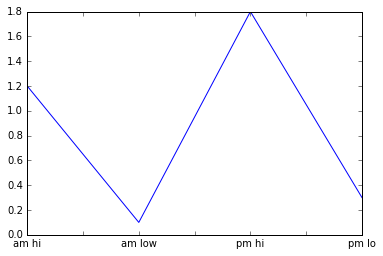

In [68]:
s.plot()

In [73]:
import matplotlib.pyplot as mpp

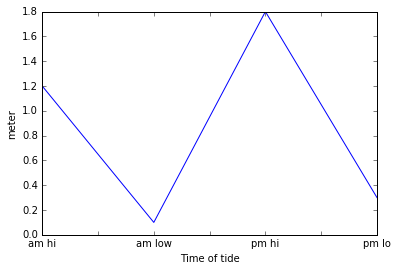

In [75]:
s.plot()
mpp.xlabel("Time of tide")
mpp.ylabel("meter")

matplotlib.pyplot()

In [87]:
read_csv()?

SyntaxError: invalid syntax (<ipython-input-87-e963ad1f0b35>, line 1)

In [94]:
all_trains = pandas.read_csv('C:\Users\huangb87\Documents\DataScience\General Assembly\SYD_DAT_5\data/sydtrains.csv', thousands =",", index_col = 1)

In [95]:
cbd2014 = all_trains[(all_trains.LINE == 'CBD') & (all_trains.YEAR==2014) ]

In [96]:
cbd2014

,LINE,YEAR,SURVEY_DATE_USED,WHETHER_SURVEYED,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS,RANK,STATION_SORT_ID
STATION,,,,,,,,,,,,,,,,,,
Central,CBD,2014,6/05/2014,Yes,940,920,10390,42070,21400,30150,45370,16270,19010,7700,97110,97110,1,101
Town Hall,CBD,2014,7/05/2014,Yes,880,880,6380,43210,16930,23550,43670,15270,21760,6720,89620,89620,2,102
Wynyard,CBD,2014,20/05/2014,Yes,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200,3,103
Redfern,CBD,2014,1/05/2014,Yes,250,250,3910,10690,5350,8170,12510,4250,3660,2320,25680,25680,6,108
Circular Quay,CBD,2014,22/05/2014,Yes,200,200,2110,8750,4340,6710,9910,3380,4070,1600,20630,20630,10,104
Martin Place,CBD,2014,27/05/2014,Yes,200,190,590,14250,2900,3420,12340,1790,4600,970,20630,20630,10,107
Museum,CBD,2014,22/05/2014,Yes,100,100,800,6290,2220,2340,5980,1230,1760,910,10860,10860,22,106
St James,CBD,2014,27/05/2014,Yes,100,90,780,5880,1900,2160,5630,1120,1440,580,9850,9850,25,105


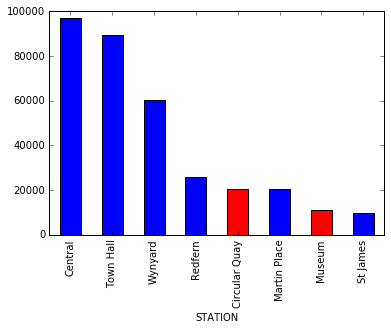

In [108]:
cbd2014.IN_24_HOURS.plot.bar(color =cs)

In [99]:
cs=[('red' if x in ['Circular Quay', 'Museum']else 'blue') for x in cbd2014.index]

In [105]:
cs

['blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue']

In [106]:
import numpy

In [110]:
numpy.where(cbd2014.IN_0200_0600< 400, "blue", "red")

array(['red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue'], 
      dtype='|S4')

In [112]:
mpp.savefig("train.jpg")

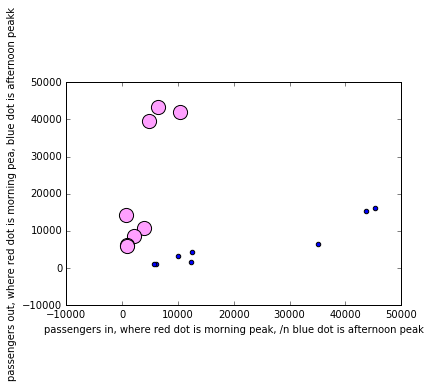

In [126]:
morning_chart = cbd2014.plot.scatter(x='IN_0600_0930', y ='OUT_0600_0930', color = '#ffa0ff', s= 200)
cbd2014.plot.scatter(x='IN_1500_1830',y='OUT_1500_1830',color='#0000ff', ax=morning_chart)
# morning_chart.xlabel("Passengers in")
matplotlib.pyplot.xlabel("passengers in, where red dot is morning peak,  blue dot is afternoon peak")
matplotlib.pyplot.ylabel("passengers out, where red dot is morning peak, blue dot is afternoon peakk")

In [119]:
cbd2014.plot.scatter?